In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=10, n_classes =2)

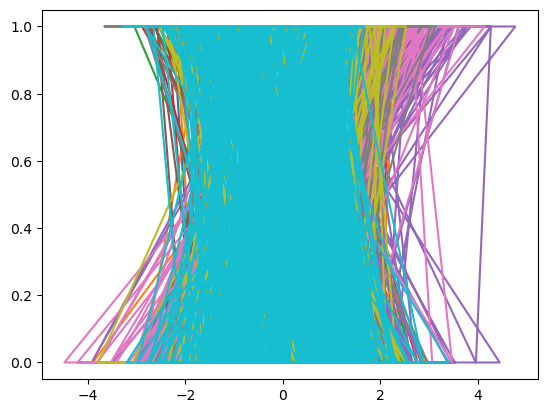

In [50]:
plt.plot(X,y)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
print(X_test.shape,X_test.shape)
print(y_test.shape,y_train.shape)

(200, 10) (200, 10)
(200,) (800,)


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [53]:
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(X_test)
print(y_pred,y_pred.shape)


[1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0] (200,)


In [55]:
probab = model.predict_proba(X_test)
print(probab)

[[2.98453880e-01 7.01546120e-01]
 [1.59298957e-01 8.40701043e-01]
 [8.09277369e-01 1.90722631e-01]
 [1.64543868e-01 8.35456132e-01]
 [7.52839697e-01 2.47160303e-01]
 [3.32686452e-01 6.67313548e-01]
 [7.03678380e-01 2.96321620e-01]
 [2.91650206e-01 7.08349794e-01]
 [6.65333962e-01 3.34666038e-01]
 [5.73149190e-02 9.42685081e-01]
 [4.95586061e-01 5.04413939e-01]
 [3.14954259e-01 6.85045741e-01]
 [8.43116272e-04 9.99156884e-01]
 [9.33666232e-01 6.63337684e-02]
 [5.73002828e-01 4.26997172e-01]
 [4.70830396e-01 5.29169604e-01]
 [2.72985988e-01 7.27014012e-01]
 [2.93758359e-01 7.06241641e-01]
 [9.45430119e-01 5.45698807e-02]
 [4.57031540e-01 5.42968460e-01]
 [9.91621402e-01 8.37859823e-03]
 [2.01683504e-01 7.98316496e-01]
 [9.57347087e-01 4.26529127e-02]
 [3.17346113e-01 6.82653887e-01]
 [6.18517168e-01 3.81482832e-01]
 [4.29151238e-01 5.70848762e-01]
 [7.91507338e-01 2.08492662e-01]
 [4.37516797e-02 9.56248320e-01]
 [8.97704880e-01 1.02295120e-01]
 [4.63909611e-01 5.36090389e-01]
 [2.337700

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
classification = classification_report(y_test,y_pred)
print(f"The Accuracy is {accuracy} and The Classification report is as Follows \n {classification}")

The Accuracy is 0.78 and The Classification report is as Follows 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       106
           1       0.74      0.83      0.78        94

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



## Lets Now Consider the hyper parameter Tuning for the Logistic Regression.

In [57]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
## these are the parameter that needs to be Tuned via Grid Search CV


In [58]:
## create a dict 
params = dict(penalty=penalty, C=c_values, solver=solver)
print(params)

{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [59]:
# grid Search Cv 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedGroupKFold
cv = StratifiedGroupKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring=accuracy, n_jobs=-1,cv=cv)
